Stratification1
Female     float64
Male       float64
Overall    float64
dtype: object
Stratification1      Female        Male     Overall
LocationDesc                                       
Alabama          247.166667  381.883333  268.085714
Alaska           266.285714  387.500000  311.462500
Arizona          215.375000  354.475000  278.837500
Arkansas         337.457143  359.925000  328.300000
California       222.800000  373.075000  291.950000


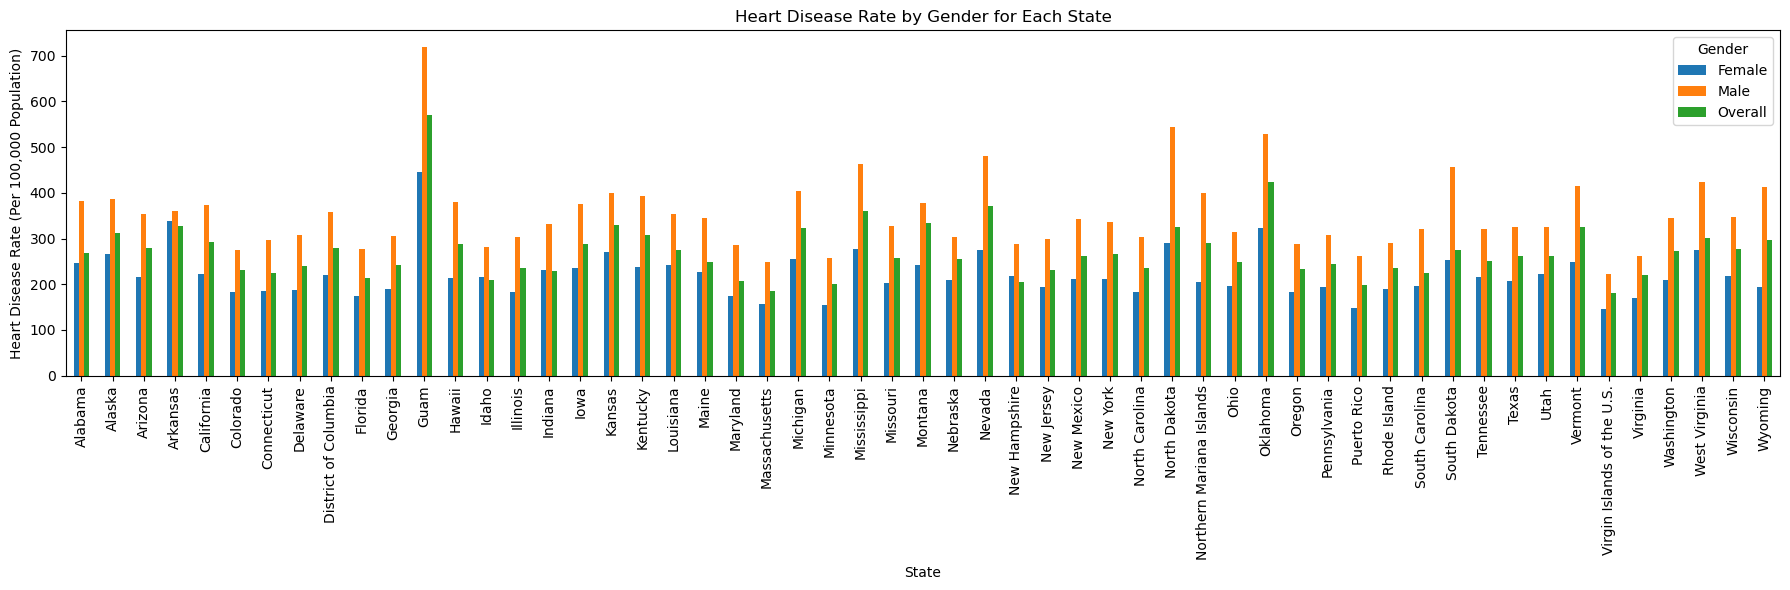

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = 'Heart_Disease_Mortality_Data_Among_US_Adults__35___by_State_Territory_and_County___2019-2021.csv'
data = pd.read_csv(file_path)

# Filter data to include only relevant columns for analysis (State, Gender, and Heart Disease Rate)
filtered_data = data[(data['StratificationCategory1'] == 'Gender') & (data['GeographicLevel'] == 'State')]

# Create a copy to avoid SettingWithCopyWarning
filtered_data = filtered_data.copy()

# Convert 'Data_Value' to numeric, coercing errors to NaN
filtered_data['Data_Value'] = pd.to_numeric(filtered_data['Data_Value'], errors='coerce')

# Drop rows with NaN 'Data_Value'
filtered_data = filtered_data.dropna(subset=['Data_Value'])

# Group by state and gender, then calculate the mean heart disease rate
gender_state_data = filtered_data.groupby(['LocationDesc', 'Stratification1'])['Data_Value'].mean().unstack()

# Verify the data types and contents
print(gender_state_data.dtypes)
print(gender_state_data.head())

# Plot the heart disease rate by gender for each state
gender_state_data.plot(kind='bar', figsize=(18, 6))
plt.title("Heart Disease Rate by Gender for Each State")
plt.xlabel("State")
plt.ylabel("Heart Disease Rate (Per 100,000 Population)")
plt.xticks(rotation=90)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


